In [2]:
import pandas as pd # data processing 
import matplotlib.pyplot as plt # plotting 
import numpy as np # linear algebra 
import seaborn as sns 

# tool for reading data csv file (faster than pandas and reads from .zip)
import datatable as dt 

# import kaggle 

# colored output text
from termcolor import colored

import re
import string 

from wordcloud import WordCloud, STOPWORDS

# Silent Warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



### Dataset in use 
### https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [4]:
fake_df1 = pd.read_csv("./archive(3)/Fake.csv")
real_df1 = pd.read_csv("./archive(3)/True.csv")

### Quick exploratory analysis of Fake News DF

In [5]:
fake_df1.head(6)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"


In [6]:
fake_df1.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [7]:
fake_df1.shape

(23481, 4)

In [8]:
fake_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
fake_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's find and remove duplicates in Fake DF

In [10]:
duplicate = fake_df1['text'][fake_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicate in {fake_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))

Found 6026 duplicate in 23481 samples


In [11]:
# remove duplicates 

fake_df1.drop(index=duplicate, inplace=True)
print(fake_df1.shape, '\n')
fake_df1.sample()

(17455, 4) 



,title,text,subject,date
5675,Paul Ryan: Republicans ‘Will Not Tolerate’ Mo...,The Democrats in the House of Representatives ...,News,"June 29, 2016"


In [12]:
fake_df1['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News'],
      dtype=object)

### Quick explanatory analysis of Real News DF

In [13]:
real_df1.head(6)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"


In [14]:
real_df1.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [15]:
real_df1.shape

(21417, 4)

In [16]:
real_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [17]:
real_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's Find and remove duplicates in Real DF

In [18]:
duplicate = real_df1['text'][real_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicate in {real_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))

Found 225 duplicate in 21417 samples


In [19]:
real_df1.drop(index=duplicate, inplace=True)
print(real_df1.shape, '\n')
real_df1.sample()

(21192, 4) 



,title,text,subject,date
5744,Exclusive: Trump to focus counter-extremism pr...,WASHINGTON/SAN FRANCISCO (Reuters) - The Trum...,politicsNews,"February 1, 2017"


In [20]:
real_df1['subject'].value_counts()

politicsNews    11214
worldnews        9978
Name: subject, dtype: int64

In [21]:
print(fake_df1.shape)
print(real_df1.shape)

(17455, 4)
(21192, 4)


### Let's add 'true' label for easier reference where Fake = 0, Real = 1

In [22]:
# label the diff df for easier ref

fake_df1['true'] = 0
real_df1['true'] = 1

# print new shape 
print(fake_df1.shape)
print(real_df1.shape)

(17455, 5)
(21192, 5)


In [23]:
# just to see 

real_df1.describe


<bound method NDFrame.describe of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reut

In [24]:
# concat the two datasets  

raw_df = pd.concat([fake_df1, real_df1], ignore_index = True)
raw_df

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
38642,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
38643,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
38644,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
38645,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [25]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38647 entries, 0 to 38646
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38647 non-null  object
 1   text     38647 non-null  object
 2   subject  38647 non-null  object
 3   date     38647 non-null  object
 4   true     38647 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [26]:
# How many are real, and how many are fake? 

raw_df.true.value_counts()

1    21192
0    17455
Name: true, dtype: int64

In [27]:
fake = raw_df[raw_df['true']==0].shape[0]
real = raw_df[raw_df['true']==1].shape[0]
fake, real

(17455, 21192)

In [28]:
# alternative way of counting by subject

for key, count in raw_df['subject'].value_counts().iteritems():
    print(f"{key}:\t{count}")

politicsNews:	11214
worldnews:	9978
News:	9050
politics:	6425
US_News:	783
left-news:	683
Government News:	514


### Let's visualise raw_df before any cleaning to allow comparison 

/Users/Taurai/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


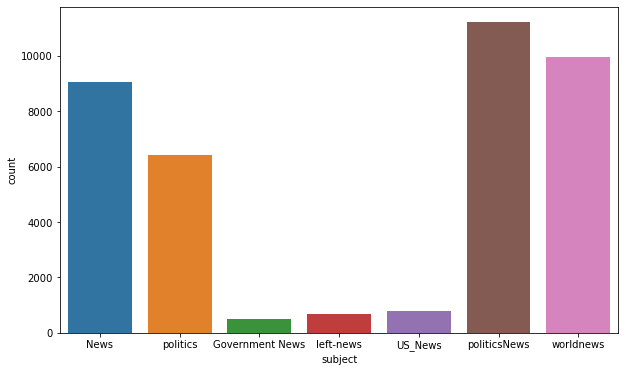

In [29]:
# spread of information sources/ subjects in raw df 

plt.figure(figsize=(10,6))
sns.countplot('subject', data = raw_df)
plt.show()

In [30]:
# group by subject and by true score
raw_df.groupby('subject')['true'].count

<bound method SeriesGroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7f8ed922cfa0>>

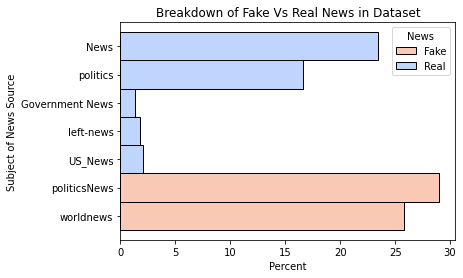

In [31]:
# plot the grouped with seaborn and matplotlib
sns.histplot(raw_df, y='subject', hue ='true', 
           stat = 'percent', multiple = 'stack',
           palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')
plt.legend(title='News', loc='upper right', labels = ['Fake', 'Real'])

#### Let's change politicsNews to politics, News to worldnews and plot again
#### This allows easier comparison of news subject for fake and real news 

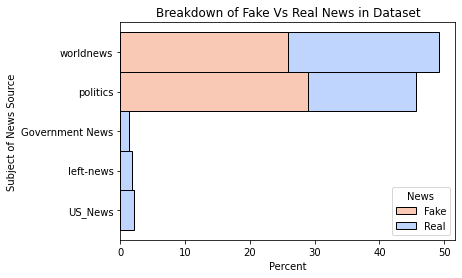

In [32]:
raw_df['subject'].replace({'politicsNews':'politics', 
                           'News':'worldnews'}, inplace = True)

sns.histplot(raw_df, y='subject', hue ='true', 
           stat = 'percent', multiple = 'stack',
           palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')
plt.legend(title='News', loc='lower right', labels = ['Fake', 'Real'])

#### Let's make a word cloud of the text for quick comparison of article content before cleaning and processing. 


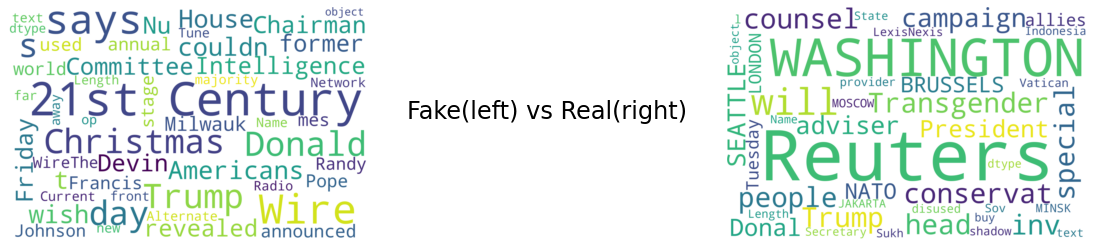

In [33]:
fake_text = raw_df.text[raw_df['true']==0]
real_text = raw_df.text[raw_df['true']==1]

def plot_fake_vs_real(fake, real):
    wordcloud_fake = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(fake))
    wordcloud_real = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(real))
    
    # plot WordCloud img 
    plt.subplots(figsize=(15,6))
    
    plt.subplot(1,3,1)
    plt.imshow(wordcloud_fake, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.suptitle("Fake(left) vs Real(right)", y=0.5, va='center', size = 24)
    
    plt.subplot(1,3,3)
    plt.imshow(wordcloud_real, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    
plot_fake_vs_real(fake_text, real_text)
plt.show()  

    

#### Let's add a wordcloud of title words too, to show what words are used as click / read-bait

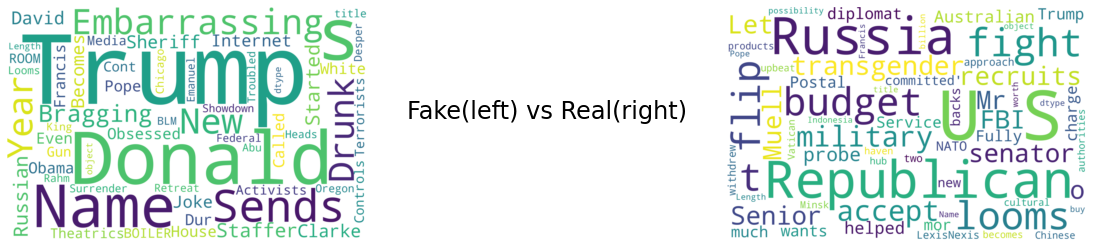

In [34]:
fake_title = raw_df.title[raw_df['true']==0]
real_title = raw_df.title[raw_df['true']==1]

plot_fake_vs_real(fake_title, real_title)
plt.show()

## Data Cleaning 

Df needs cleaning. Ultimate Goal is:  
* Check for null values
* check for empty spaces 
* check for nonsense texts 
* remove urls, https, special characters? 
* remove REUTERS()


In [35]:
# check raw_df starting point
raw_df.shape

(38647, 5)

In [36]:
# check null values
raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
dtype: int64

In [37]:
# drop missing values

raw_df = raw_df.dropna()
raw_df.shape

# Note, dropna() not picking up null values as still some text missing in DF. 

(38647, 5)

#### Below is initial code for removing publisher info (reuters), but since it uses '-' to seperate, it may target necessary hyphens in texts. Left out for more favourable option below 

In [38]:
# Initial code for removing publisher info. 
""" # Make [index] for rows that don't have publication info (REUTERS)
# note: not all - are reuters, and may be in actual text


no_publisher = []
for index, row in enumerate(raw_df.text.values):
    try:
        record = row.split(" -", maxsplit=1)
        
        # if no text present, this should raise error 
        record[1]
        assert(len(record[0]) < 260)
    except:
        no_publisher.append(index)
        

# check for the 'clean' data, that doesn't start with REUTERS
# note 23445 records

raw_df.iloc[no_publisher].text


# create list of indexes for rows that have publication info (REUTERS)
# this will seperate the text from the publisher info (i.e seperate REUTERS())

publisher = []
pt_text=[]

for index, row in enumerate(raw_df.text.values):
    if index in no_publisher: 
        
#         if no publisher mentioned, add unknown
        pt_text.append(row)
        publisher.append("Unknown")
        continue 
        
    record = row.split(" -", maxsplit=1)
    publisher.append(record[0])
    pt_text.append(record[1])
    

# replace current text column with the new one made above 
# add new seperate column for publisher info (i.e REUTERS())

raw_df["publisher"] = publisher 
raw_df["text"] = pt_text

del publisher, pt_text, record, no_publisher

""" 

' # Make [index] for rows that don\'t have publication info (REUTERS)\n# note: not all - are reuters, and may be in actual text\n\n\nno_publisher = []\nfor index, row in enumerate(raw_df.text.values):\n    try:\n        record = row.split(" -", maxsplit=1)\n        \n        # if no text present, this should raise error \n        record[1]\n        assert(len(record[0]) < 260)\n    except:\n        no_publisher.append(index)\n        \n\n# check for the \'clean\' data, that doesn\'t start with REUTERS\n# note 23445 records\n\nraw_df.iloc[no_publisher].text\n\n\n# create list of indexes for rows that have publication info (REUTERS)\n# this will seperate the text from the publisher info (i.e seperate REUTERS())\n\npublisher = []\npt_text=[]\n\nfor index, row in enumerate(raw_df.text.values):\n    if index in no_publisher: \n        \n#         if no publisher mentioned, add unknown\n        pt_text.append(row)\n        publisher.append("Unknown")\n        continue \n        \n    record 

In [39]:
# how many have <CITY>(Reuters) pattern in text 
# pattern = 0+ uppercase letters, 0 or 1 spaces, (Reuters)

pattern = r'[A-Z]* ?\(Reuters\)'

test_df = raw_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

result = f"{test_df.groupby('patterns')['text'].count()[1]} of {raw_df.shape[0]} samples have <City> (REUTERS) pattern."
print(colored(result, 'blue', attrs=['bold']))


21028 of 38647 samples have <City> (REUTERS) pattern.


In [40]:
# remove pattern <CITY> (Reuters)

raw_df['text'] = raw_df['text'].map(lambda x: re.sub(pattern, '', x))

In [41]:
raw_df.head(6)

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,worldnews,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",worldnews,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,worldnews,"December 25, 2017",0


In [42]:
raw_df.tail(6)

,title,text,subject,date,true
38641,North Korea shipments to Syria chemical arms a...,UNITED - Two North Korean shipments to a Syri...,worldnews,"August 21, 2017",1
38642,'Fully committed' NATO backs new U.S. approach...,- NATO allies on Tuesday welcomed President D...,worldnews,"August 22, 2017",1
38643,LexisNexis withdrew two products from Chinese ...,"- LexisNexis, a provider of legal, regulatory...",worldnews,"August 22, 2017",1
38644,Minsk cultural hub becomes haven from authorities,- In the shadow of disused Soviet-era factori...,worldnews,"August 22, 2017",1
38645,Vatican upbeat on possibility of Pope Francis ...,- Vatican Secretary of State Cardinal Pietro ...,worldnews,"August 22, 2017",1
38646,Indonesia to buy $1.14 billion worth of Russia...,- Indonesia will buy 11 Sukhoi fighter jets w...,worldnews,"August 22, 2017",1


In [43]:
raw_df.describe(include=[np.object])

/var/folders/c3/v3dfqb6n50x96zb4934m6ky00000gn/T/ipykernel_16847/2623235650.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_df.describe(include=[np.object])


,title,text,subject,date
count,38647,38647,38647,38647
unique,38271,38646,5,2397
top,Factbox: Trump fills top jobs for his administ...,,worldnews,"December 6, 2017"
freq,14,2,19028,166


In [44]:
raw_df.describe(include=[np.number])

,true
count,38647.000000
mean,0.548348
std,0.497663
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [45]:
raw_df.describe(include='all')

,title,text,subject,date,true
count,38647,38647,38647,38647,38647.000000
unique,38271,38646,5,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,worldnews,"December 6, 2017",NaN
freq,14,2,19028,166,NaN
mean,NaN,NaN,NaN,NaN,0.548348
std,NaN,NaN,NaN,NaN,0.497663
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [48]:
raw_df.text.value_counts()

In [44]:
# Check for empty rows 

raw_df[raw_df['text'].str.strip()=='']

,title,text,subject,date,true
10920,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
12032,TRUMP SLAMS THE GLOBALISTS: “There is no globa...,,politics,"Dec 1, 2016",0
26375,Graphic: Supreme Court roundup,,politics,"June 16, 2016",1


In [45]:
# drop the above empty rows 

raw_df = raw_df[raw_df['text'].str.strip()!='']
raw_df.shape

(38644, 5)

### Run below just to double check no empty once more 

In [46]:
# check for empty rows and list them
#  note 631 empty values 

empty = [index for index, text in enumerate(raw_df.text.values) if str(text).strip()=='']
print(f"Number of empty rows: {len(empty)}")
raw_df.iloc[empty].tail()

Number of empty rows: 0


,title,text,subject,date,true


#### Confirm dropped unecessary rows. 

In [47]:
# text has bool true so should return false if empty 
# just another way to check for null values 
# note DF length matches above with 38644 rows

raw_df['text'].astype(bool)

0        True
1        True
2        True
3        True
4        True
         ... 
38642    True
38643    True
38644    True
38645    True
38646    True
Name: text, Length: 38644, dtype: bool

### Expand into day, month, year

In [48]:
# date -> datetime

def get_day_mon_yr(date):
    try: 
        return pd.to_datetime(date, infer_datetime_format = True)
    except:
        return np.nan
    
raw_df['Date'] = raw_df.apply(lambda row: get_day_mon_yr(row['date']), axis = 1)
raw_df.sample(5)

,title,text,subject,date,true,Date
24973,Clinton leading Trump by 2 points in McClatchy...,- Democratic presidential candidate Hillary C...,politics,"November 4, 2016",1,2016-11-04
14533,No Joke! Hillary Clinton Tries To Censor Laugh...,And this woman wants to be in charge of Americ...,politics,"Nov 18, 2015",0,2015-11-18
37818,"Trump speaks with leaders of Saudi Arabia, UAE...",- U.S. President Donald Trump spoke separatel...,worldnews,"September 8, 2017",1,2017-09-08
3807,Actress Emmy Rossum Fires Back At Trump Fans ...,"Donald Trump s hateful, divisive rhetoric brou...",worldnews,"November 14, 2016",0,2016-11-14
11418,WAKE-UP CALL! IRANIAN REFUGEE Warns The West: ...,I m a political refugee from Iran. I ve been ...,politics,"Mar 5, 2017",0,2017-03-05


In [49]:
# check null values (none expected)

raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
Date       6
dtype: int64

In [50]:
# check where Date is NaN
# DO this for text column too and check frequency in descibe all 

raw_df[raw_df['Date'].isna()]

,title,text,subject,date,true,Date
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0,NaT
15121,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0,NaT
15122,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0,NaT
15424,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
15425,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
16128,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0,NaT


In [51]:
raw_df.shape

(38644, 6)

In [52]:
# drop the NaN values 

raw_df.dropna(inplace=True)
print(raw_df.shape)
raw_df.sample(5)

(38638, 6)


,title,text,subject,date,true,Date
3334,Trump Responds To Berlin Truck Attack With DA...,Donald Trump turned a tragedy into an opportun...,worldnews,"December 20, 2016",0,2016-12-20
37633,"Russia, Jordan agree to speed de-escalation zo...",- Jordan said on Monday it was working with R...,worldnews,"September 11, 2017",1,2017-09-11
30666,Ireland says wants 'agreed wording' on Brexit ...,- Ireland wants re-assurance from Britain the...,worldnews,"December 1, 2017",1,2017-12-01
25725,Virginia Republicans seek to block governor's ...,- Virginia Republican leaders said they will ...,politics,"August 31, 2016",1,2016-08-31
22528,"Corker, critic of first Trump travel ban order...",- The U.S. Senate Foreign Relations Committee...,politics,"March 6, 2017",1,2017-03-06


In [53]:
# check where date is NOT NaN
# note: matches df shape above 

raw_df[raw_df['Date'].notna()]

,title,text,subject,date,true,Date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,worldnews,"December 31, 2017",0,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,"December 31, 2017",0,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,"December 30, 2017",0,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",worldnews,"December 29, 2017",0,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,"December 25, 2017",0,2017-12-25
...,...,...,...,...,...,...
38642,'Fully committed' NATO backs new U.S. approach...,- NATO allies on Tuesday welcomed President D...,worldnews,"August 22, 2017",1,2017-08-22
38643,LexisNexis withdrew two products from Chinese ...,"- LexisNexis, a provider of legal, regulatory...",worldnews,"August 22, 2017",1,2017-08-22
38644,Minsk cultural hub becomes haven from authorities,- In the shadow of disused Soviet-era factori...,worldnews,"August 22, 2017",1,2017-08-22
38645,Vatican upbeat on possibility of Pope Francis ...,- Vatican Secretary of State Cardinal Pietro ...,worldnews,"August 22, 2017",1,2017-08-22


In [54]:
# Add cols for day, month, year 

raw_df['day']= raw_df.apply(lambda row: row['Date'].day, axis=1)
raw_df['month']= raw_df.apply(lambda row: row['Date'].month, axis =1)
raw_df['year']= raw_df.apply(lambda row: row['Date'].year, axis = 1)

# drop redundant date cols
raw_df.drop(['date','Date'], axis=1, inplace=True)
raw_df.sample(3)

,title,text,subject,true,day,month,year
29456,Sports sector wins reprieve in EU copyright re...,- Soccer leagues such as England s Premier Le...,worldnews,1,15,12,2017
13321,BREAKING: FL MUSLIM TERRORIST Worked For Secur...,"As a side note, the illegal aliens who are bei...",politics,0,13,6,2016
35755,Deadly twin suicide attack hits Damascus polic...,- Two suicide bombers struck a police station...,worldnews,1,2,10,2017


#### Let's plot the correlation between date and target 

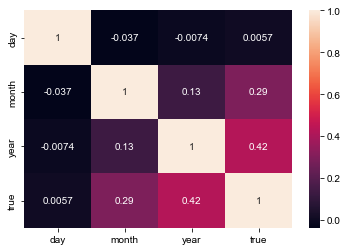

In [55]:
sns.heatmap(raw_df[['day', 'month', 'year', 'true']].corr(), annot=True)
sns.set(rc={'figure.figsize':(10,6)})


### Unique chars in text 

#### Let's plot the length of unique characters in the text, and 'true-value'

In [56]:
# count unique alphabet characters in text of each article 

def unique_char_num(string): 
    lower_str = string.lower()
    alpha = re.sub(r'[^a-z]','',lower_str)
    unique_ch = set(list(alpha))
    n_unique_ch = len(unique_ch)
    return n_unique_ch 

temp_df = raw_df[['text', 'true']].copy()
temp_df['unique_char'] = temp_df.text.map(lambda x: unique_char_num(x))
temp_df.head()

,text,true,unique_char
0,Donald Trump just couldn t wish all Americans ...,0,25
1,House Intelligence Committee Chairman Devin Nu...,0,24
2,"On Friday, it was revealed that former Milwauk...",0,25
3,"On Christmas day, Donald Trump announced that ...",0,26
4,Pope Francis used his annual Christmas Day mes...,0,25


In [57]:
# sort into descending order by unique_char

to_plot = temp_df.sort_values(by='unique_char', ascending=False).reset_index()

# add text length col to DF 
to_plot['text_len']= to_plot.text.map(lambda x: len(x))
to_plot

,index,text,true,unique_char,text_len
0,19327,- The workforce at the U.S. Environmental Pr...,1,26,1935
1,10289,Lt. Col. Tony Shaffer opened a can of worms to...,0,26,8452
2,10277,"So what s worse, Barack Obama remaining silent...",0,26,4594
3,29462,- Lebanon has set a date of May 6 next year t...,1,26,2135
4,29461,- Australia should introduce a law forcing re...,1,26,3962
...,...,...,...,...,...
38633,11113,Enjoy:,0,5,6
38634,11846,Via: WT,0,5,7
38635,11891,Enjoy,0,5,6
38636,12407,Via: GP,0,5,7


<AxesSubplot:xlabel='text_len', ylabel='unique_char'>

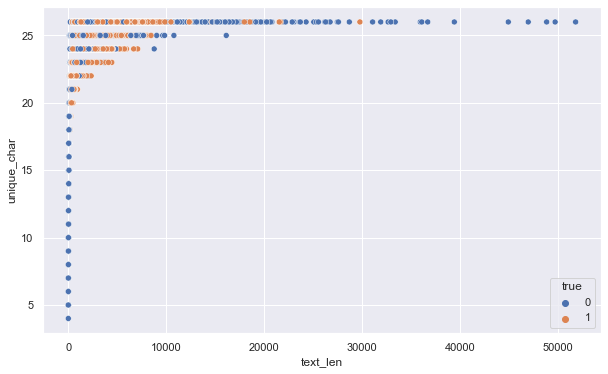

In [58]:
sns.scatterplot(data=to_plot, x='text_len', 
                y='unique_char', hue='true')  

In [ ]:
# This took a long time to exe. will look for laternative faster code 

line1= f"{to_plot[to_plot['unique_char']<20].count()[0]} articles used less than 20 unique characters in their text"
line2= f"{to_plot[to_plot['unique_char']<20].max()} is the longest piece of text that had less than 20 unique characters"
line3= f"{to_plot[to_plot['unique_char']>=20].mean().astype(int)} is the average length of the text, where the article had 20 or more unique characters"

print(colored(line1, 'dark_green', attrs=['bold']))
print(colored(line2, 'navy_blue', attrs=['bold']))
print(colored(line3, 'magenta', attrs=['bold']))

In [59]:
cleaned_df = raw_df.copy()
cleaned_df.to_csv('cleaned_news.csv', encoding='utf-8')

## Show distribution of text count for each category as well?

### Let's finish cleaning up the DF and Preprocessing 

Delete unecessary cols - day, month, year, subject, title 
They won't be needed going forwards


In [61]:
cleaned_df.head(3)

,title,text,subject,true,day,month,year
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,worldnews,0,31,12,2017
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,0,31,12,2017
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,0,30,12,2017


In [62]:
del cleaned_df['year']
del cleaned_df['month']
del cleaned_df['day']
del cleaned_df['subject']
del cleaned_df['title']


cleaned_df.head(10)

,text,true
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


#### Let's really clean up the data

* Remove punctuation
* remove special char 
* convert upper to lower 
* remove stopwords
* remove urls
* Lemmatization - The stemming of words without loss of meaning to context


##### We'll clean the first 10 news article only for now... 

In [63]:
text_1 = cleaned_df.text[10]
text_1


"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [64]:
#  use contractions lib for context when expanding contractions (i'd -> i would)
import contractions 

In [65]:
# contractions now working after comnverting to str 

text_1 = ' '.join([contractions.fix(word) for word in text_1.split()])
text_1



"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [66]:
#  remove stopwords 
#  is stopword library inclusive enough? 


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text_1 = word_tokenize(text_1) 
text_1 = [ word for word in text_1 if not word in set(stopwords.words("english"))]


In [67]:
text_1 = ' '.join(text_1)
text_1

"A centerpiece Donald Trump campaign , presidency , white supremacist ways . That many public feuds gets involve people color . One favorite targets , , course , players National Football League dare exercise First Amendment rights kneeling national anthem protest racist police brutality . Well , one person figured racism bad business , even get orange overlord elected : The founder pizza chain Papa John s.This man never right side history number issues , plus pizza sucks . But , decided complain players protesting , sales really dropped . Turns racism pay , know corporations bottom line . Therefore , Papa John Schnatter longer CEO hack pizza chain.BREAKING : Papa John 's founder John Schnatter step CEO ; announcement comes weeks criticized NFL protests . AP Business News ( @ APBusiness ) December 21 , 2017The thing , people certainly allowed political opinions , realize opinions often come dire consequences especially one business trying garner sales support people , one would presume

In [68]:
# Remove special characters and punctuation 
import re 
import string 

text_1 = re.sub('\[[^]]*\]', ' ', text_1)
text_1 = re.sub('[^a-zA-Z]', ' ', text_1)

#  convert from  upper to lower 
text_1 = text_1.lower()

text_1

'a centerpiece donald trump campaign   presidency   white supremacist ways   that many public feuds gets involve people color   one favorite targets     course   players national football league dare exercise first amendment rights kneeling national anthem protest racist police brutality   well   one person figured racism bad business   even get orange overlord elected   the founder pizza chain papa john s this man never right side history number issues   plus pizza sucks   but   decided complain players protesting   sales really dropped   turns racism pay   know corporations bottom line   therefore   papa john schnatter longer ceo hack pizza chain breaking   papa john  s founder john schnatter step ceo   announcement comes weeks criticized nfl protests   ap business news     apbusiness   december          the thing   people certainly allowed political opinions   realize opinions often come dire consequences especially one business trying garner sales support people   one would presume

In [69]:
#  removal of HTML content

from bs4 import BeautifulSoup

soup = BeautifulSoup(text_1, "html.parser")
text_1 = soup.get_text()
text_1

'a centerpiece donald trump campaign   presidency   white supremacist ways   that many public feuds gets involve people color   one favorite targets     course   players national football league dare exercise first amendment rights kneeling national anthem protest racist police brutality   well   one person figured racism bad business   even get orange overlord elected   the founder pizza chain papa john s this man never right side history number issues   plus pizza sucks   but   decided complain players protesting   sales really dropped   turns racism pay   know corporations bottom line   therefore   papa john schnatter longer ceo hack pizza chain breaking   papa john  s founder john schnatter step ceo   announcement comes weeks criticized nfl protests   ap business news     apbusiness   december          the thing   people certainly allowed political opinions   realize opinions often come dire consequences especially one business trying garner sales support people   one would presume

In [70]:
# Lemmatization 

from nltk.stem.wordnet import WordNetLemmatizer

lemma = WordNetLemmatizer()
text_1 = [lemma.lemmatize(word) for word in text_1.split()]

text_1 = " ".join(text_1)
text_1

'a centerpiece donald trump campaign presidency white supremacist way that many public feud get involve people color one favorite target course player national football league dare exercise first amendment right kneeling national anthem protest racist police brutality well one person figured racism bad business even get orange overlord elected the founder pizza chain papa john s this man never right side history number issue plus pizza suck but decided complain player protesting sale really dropped turn racism pay know corporation bottom line therefore papa john schnatter longer ceo hack pizza chain breaking papa john s founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december the thing people certainly allowed political opinion realize opinion often come dire consequence especially one business trying garner sale support people one would presume goal ceo s no one know whether pressure shareholder public outcry boycott even nfl a

* perhaps remove numbers? 
* what about exclamation and question marks? 

### Now lets use the tested cleansing above and make functions to  cleanse all text. add a few more functions

In [75]:
# remove URL
def remove_URL(text):
    url = re.compile(r'https?://\S+')
    return url.sub(r' httpsmark ', text)

# HTML removal 
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


# Remove punctuation
def remove_punct(text):
    return re.sub('\[[^]]*\]', '', text)


# remove special chars
def remove_chars(text):
    return re.sub("[^a-zA-A]", " ", text)

# remove emoji 
""" def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' emoji ', string)
""" 

# remove stopwords
def remove_stop_and_lemmat(text): 
    final_text = []
    text = text.lower()
    text = word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma = WordNetLemmatizer()
            word = lemma.lemmatize(word)
            final_text.append(word)
    return " ".join(final_text)


# try timer against smaller piece of text to see what function is slow

import time

starttime=time.time()
duration=time.time() - starttime


# full function 
def cleanse(text):
    starttime
    text = remove_URL(text)
    duration
    text = remove_html(text)
    text = remove_punct(text)
    text = remove_chars(text)
    # text = remove_emoji(text)
    text = remove_stop_and_lemmat(text)
    


In [ ]:
# try timer against smaller piece of text to see what function is slow

import time

starttime=time.time()
duration=time.time() - starttime

In [76]:
# Apply function to text col
# Note: haven't tested this as took too long to run. Suspect it maybe remove_emoji()

cleaned_df['text']=cleaned_df['text'].apply(cleanse)

KeyboardInterrupt: 

In [72]:
cleaned_df.head()

# current output shows before cleanse function

,text,true
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [73]:
cleaned_df.tail(15)

#current output is before cleanse function

,text,true
38632,BUENOS - Argentina s main labor unions took t...,1
38633,ON BOARD A U.S. MILITARY - The U.S. Air Force...,1
38634,- The United States suggested on Tuesday it c...,1
38635,- The United States has decided to deny Egypt...,1
38636,- Outlining a new strategy for the war in Afg...,1
38637,- North Korea and the United States clashed a...,1
38638,"SAO - Cesar Mata Pires, the owner and co-foun...",1
38639,- North Korea and the United States accused e...,1
38640,- Danish police said on Tuesday the size of a...,1
38641,UNITED - Two North Korean shipments to a Syri...,1


# Haven't tested any function post this due to time. will confirm function 

#### Let's make a new wordcloud using the cleaned data 

In [ ]:
# STOPWORDS =set(nltk.corpus.stopwords.words("english")).generate(text)

plt.figure(figsize = (10,6))
wc = WordCloud(width = 440, 
               height = 200, 
               stopwords =set(nltk.corpus.stopwords.words("english")).generate(" ".join(cleaned_df['text']))
plt.imshow(wc, interpolation = 'bilinear')

### N-Gram Analysis

#### Let's see the popular words and word combinations in the text articles 
#### N-grams are sequences of words or symbols. n = number of sequences 
#### 1 sequence = unigram. 2 sequences = bigram, 3 sequences = trigram
#### unigram = most frequent word. bigram = most frequent pair of words... 



In [ ]:
# text used is from cleaned data. 
# copy text, then declare string so we can use it in function 

texts = ' '.join(cleaned_df)
string = texts.split(" ")

In [ ]:
# string = string dtype. i = num of variables who's sequence we want
# declare n-gram as df from nltk.ngram() and group by highest count 
# limited to 20 top results 
# rename df columns to plot diagram 

def draw_n-gram(string, i): 
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:20]
    n_gram_df = pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.rest_index()
    n_gram_df = g_gram_df.rename(columns={'index':'word',0: 'count'})
    
    print(n_gram_df.head())
    
    plt.figure(figsize(15,8))
    return sns.barplot(x='count', y='word',
                      data=n_gram_df, pallete='coolwarm')


In [ ]:
# let's call the unigram analysis function we've created 
# the most popular words 
draw_n_gram(string, 1)

In [ ]:
# the most common pair of words 

draw_n_gram(string, 2)

In [ ]:
# the most common triage of words 

draw_n_gram(string, 3)

#### Save cleaned DF 

In [ ]:
final_df = cleaned_df[['text','true']].copy()
final_df.to_csv('fake_real_news_dataset.csv', index=False)
final_df.head()

## Group to do list:
* Sentiment analysis (Princess & Nicola)
* ML and Modelling (Rose, Janka & Victoria)
* Create Presentations (Nicola) 
* Write Project Report 
